Dosya linkten indiriliyor...


Downloading...
From (original): https://drive.google.com/uc?id=1isUgVUKuNJ2ns8PJr7Vy0j53xqjorf4V
From (redirected): https://drive.google.com/uc?id=1isUgVUKuNJ2ns8PJr7Vy0j53xqjorf4V&confirm=t&uuid=6f0cfbab-441e-4857-a04f-506c346c3580
To: /content/downloaded_dataset.zip
100%|██████████| 63.3M/63.3M [00:00<00:00, 108MB/s]


İndirme tamamlandı!
Zip açılıyor...
Zip açıldı.

Veriler okunuyor...
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Eğitim Başlıyor... (GPU: Aktif)
Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 43s 73ms/step - accuracy: 0.2263 - loss: 2.4809 - val_accuracy: 0.2544 - val_loss: 1.9233
Epoch 2/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.3705 - loss: 1.7808 - val_accuracy: 0.4072 - val_loss: 1.5750
Epoch 3/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.4281 - loss: 1.5310 - val_accuracy: 0.5060 - val_loss: 1.2961
Epoch 4/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.4666 - loss: 1.4110 - val_accuracy: 0.5251 - val_loss: 1.2436
Epoch 5/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5058 - loss: 1.3155 - val_accuracy: 0.5403 - val_loss: 1.2230
Epoch 6/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.5255 - loss: 1.2671 - val_accuracy: 0.5364 - val_loss: 1.2257
Epoch 7/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5341 - loss: 1.2382 - val_accuracy: 0.5701 - val_loss: 1.1612
Epoch 8/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5380 - loss: 1.2271 - val_accurac

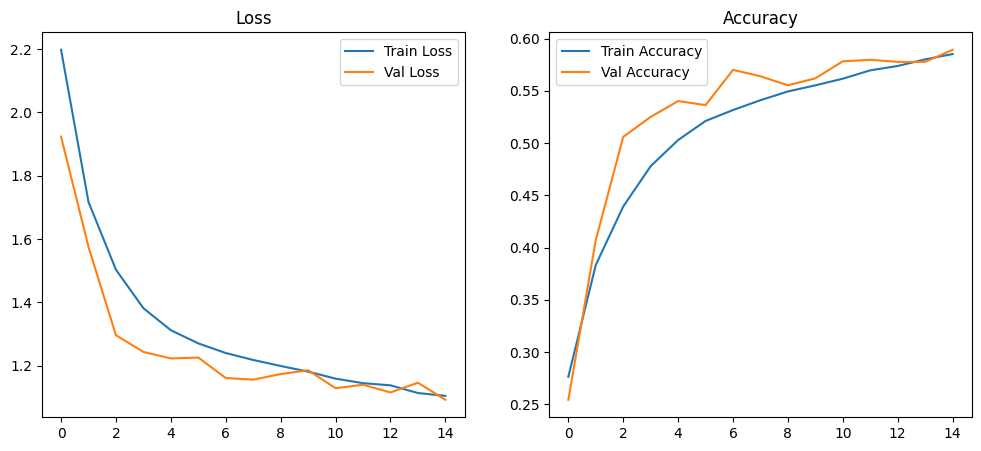

In [ ]:
import os
import gdown
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# 1. DOSYAYI LİNKTEN DİREKT İNDİRME
file_id = '1isUgVUKuNJ2ns8PJr7Vy0j53xqjorf4V'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'downloaded_dataset.zip'

if not os.path.exists(output):
    print("Dosya linkten indiriliyor...")
    gdown.download(url, output, quiet=False)
    print("İndirme tamamlandı!")
else:
    print("Dosya zaten indirilmiş.")

# 2. ZIP AÇMA
extract_path = '/content/dataset'
if not os.path.exists(extract_path):
    print("Zip açılıyor...")
    with zipfile.ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Zip açıldı.")

train_dir = os.path.join(extract_path, 'train')
test_dir = os.path.join(extract_path, 'test')

# 3. VERİ HAZIRLAMA
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

print("\nVeriler okunuyor...")
try:
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode='grayscale',
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode='grayscale',
        class_mode='categorical'
    )
except:
    print("HATA: Klasör bulunamadı. Lütfen linkin erişim iznini 'Herkes' yaptığından emin ol.")

# 4. MODELİ KURMA (CNN)
model = Sequential()

# Blok 1
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Blok 2
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Blok 3
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# 5. EĞİTİM
print("\nEğitim Başlıyor... (GPU: " + ("Aktif" if tf.config.list_physical_devices('GPU') else "YOK") + ")")

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

# 6. SONUÇ GRAFİKLERİ
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

Test verisi değerlendirme için hazırlanıyor...
Found 7178 images belonging to 7 classes.
Model tahmin yapıyor, lütfen bekle...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step


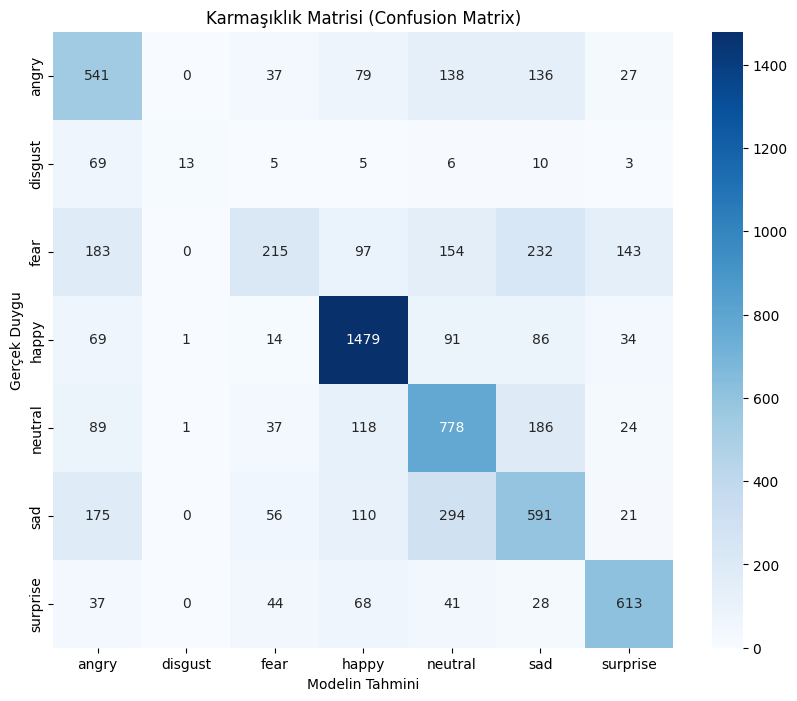


DETAYLI PERFORMANS RAPORU
              precision    recall  f1-score   support

       angry       0.47      0.56      0.51       958
     disgust       0.87      0.12      0.21       111
        fear       0.53      0.21      0.30      1024
       happy       0.76      0.83      0.79      1774
     neutral       0.52      0.63      0.57      1233
         sad       0.47      0.47      0.47      1247
    surprise       0.71      0.74      0.72       831

    accuracy                           0.59      7178
   macro avg       0.62      0.51      0.51      7178
weighted avg       0.59      0.59      0.57      7178



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

print("Test verisi değerlendirme için hazırlanıyor...")
test_generator_eval = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False
)

print("Model tahmin yapıyor, lütfen bekle...")
predictions = model.predict(test_generator_eval)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator_eval.classes

class_labels = list(test_generator_eval.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Karmaşıklık Matrisi (Confusion Matrix)')
plt.ylabel('Gerçek Duygu')
plt.xlabel('Modelin Tahmini')
plt.show()

print("\n" + "="*60)
print("DETAYLI PERFORMANS RAPORU")
print("="*60)
print(classification_report(y_true, y_pred, target_names=class_labels))

In [ ]:
print("Model kaydediliyor...")
model.save('duygu_analizi_modeli.h5')
print("Model başarıyla 'duygu_analizi_modeli.h5' olarak kaydedildi!")

Model kaydediliyor...
Model başarıyla 'duygu_analizi_modeli.h5' olarak kaydedildi!


Modelin mimarisi çiziliyor...
Şema kaydedildi! (model_semasi.png)


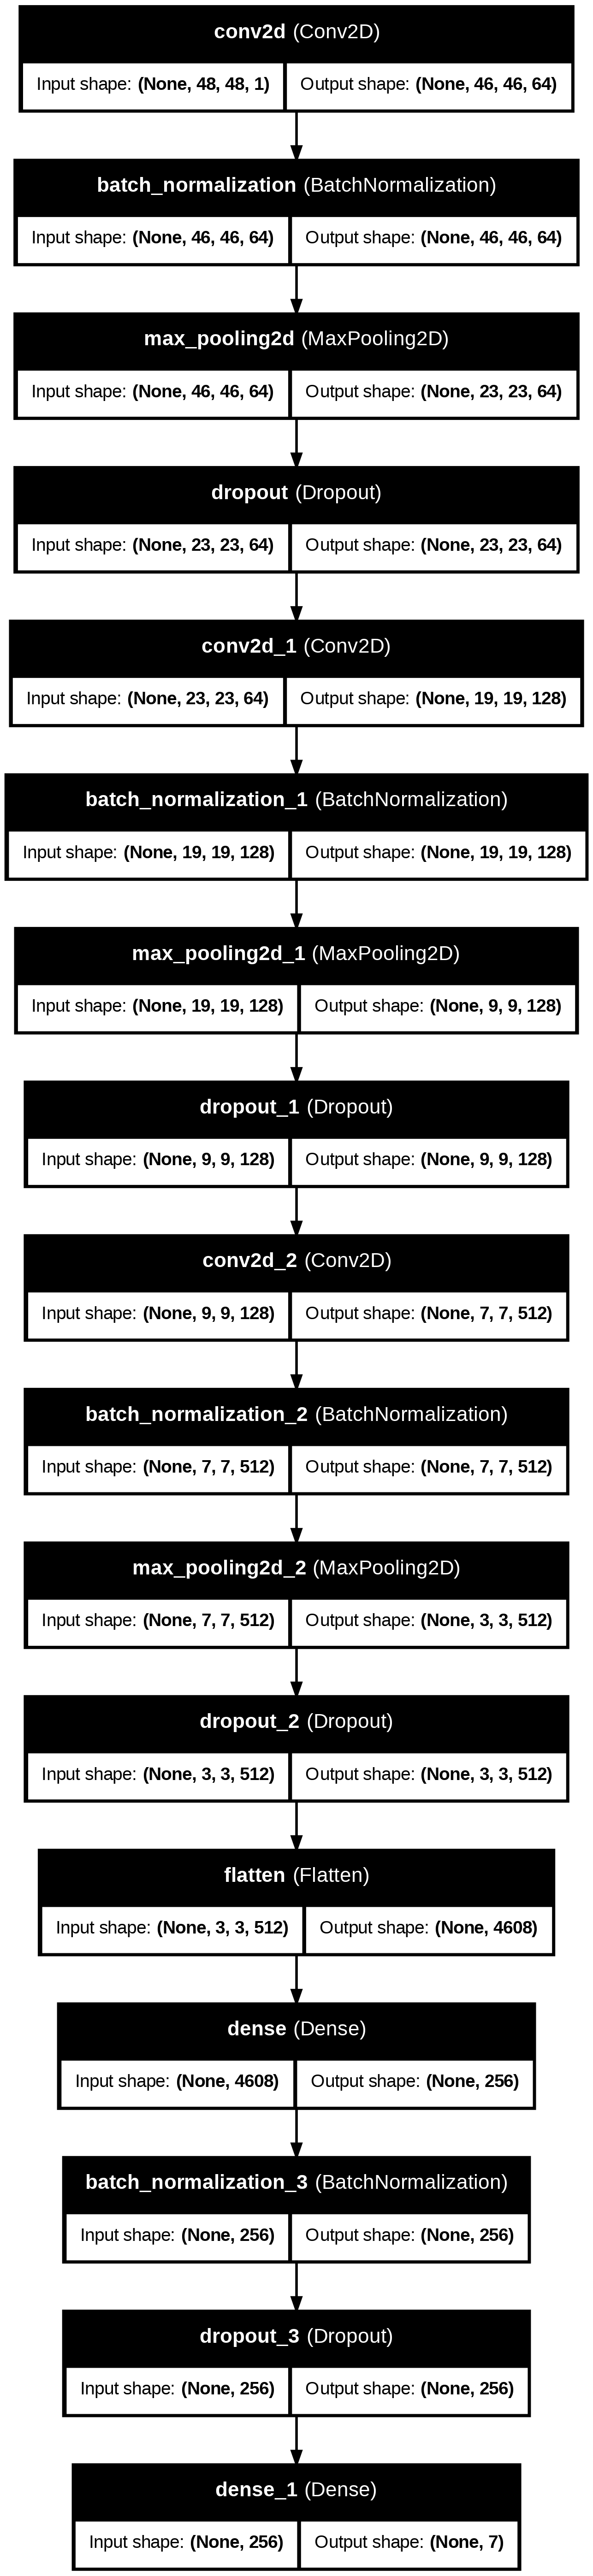

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

print("Modelin mimarisi çiziliyor...")
plot_model(model, to_file='model_semasi.png', show_shapes=True, show_layer_names=True)
print("Şema kaydedildi! (model_semasi.png)")
Image('model_semasi.png')

Toplam 2948 hatalı tahmin var. İşte rastgele 5 tanesi:


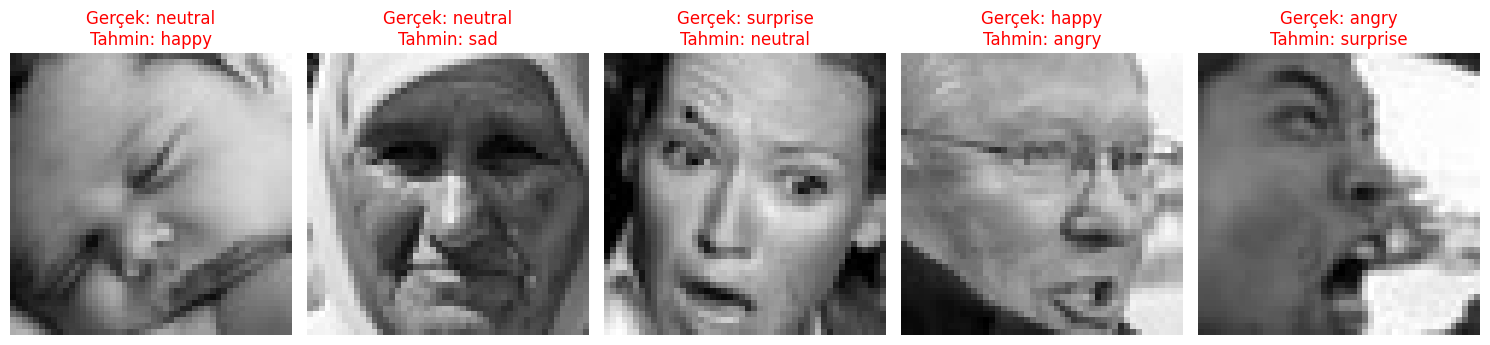

In [ ]:
import random

y_pred_classes = np.argmax(predictions, axis=1)
y_true_classes = test_generator_eval.classes
class_labels = list(test_generator_eval.class_indices.keys())

errors = np.where(y_pred_classes != y_true_classes)[0]

plt.figure(figsize=(15, 5))
print(f"Toplam {len(errors)} hatalı tahmin var. İşte rastgele 5 tanesi:")

for i, error_idx in enumerate(random.sample(list(errors), 5)):
    plt.subplot(1, 5, i+1)

    img_path = os.path.join(test_dir, test_generator_eval.filenames[error_idx])
    img = plt.imread(img_path)

    plt.imshow(img, cmap='gray')

    true_label = class_labels[y_true_classes[error_idx]]
    pred_label = class_labels[y_pred_classes[error_idx]]

    plt.title(f"Gerçek: {true_label}\nTahmin: {pred_label}", color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [1]:
!pip install gradio

In [11]:
import gradio as gr
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image
import os

print("1. Kütüphaneler yüklendi...")

# 1. MODELİ YÜKLE
model_path = 'duygu_analizi_modeli.h5'

try:
    if model is None:
        model = tf.keras.models.load_model(model_path)
except:
    print("2. Model yükleniyor...")
    if os.path.exists(model_path):
        model = tf.keras.models.load_model(model_path)
        print("   Model başarıyla yüklendi!")
    else:
        print("   HATA: .h5 dosyası bulunamadı! Lütfen eğitimi tekrar yapın veya dosyayı yükleyin.")

class_labels = ['Kizgin', 'Igrenme', 'Korku', 'Mutlu', 'Notr', 'Uzgun', 'Saskin']

# 2. YÜZ TANIMA (İNDİRMEDEN - DAHİLİ DOSYA)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
print("3. Yüz tanıma sistemi hazır.")

# 3. AKILLI TAHMİN FONKSİYONU
def akilli_duygu_analizi(input_img):
    if input_img is None:
        return input_img, "Görüntü Bekleniyor..."

    img_copy = input_img.copy()
    gray = cv2.cvtColor(img_copy, cv2.COLOR_RGB2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.1, 5, minSize=(30, 30))

    result_text = "Yüz Bulunamadı (Kameraya Yaklaşın)"
    probabilities = {label: 0.0 for label in class_labels}

    for (x, y, w, h) in faces:
        face_roi = gray[y:y+h, x:x+w]

        resized = cv2.resize(face_roi, (48, 48))
        normalized = resized / 255.0
        reshaped = normalized.reshape(1, 48, 48, 1)

        if model:
            prediction = model(reshaped, training=False).numpy()[0]
            idx = np.argmax(prediction)
            label = class_labels[idx]
            confidence = prediction[idx] * 100

            cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
            text = f"{label} %{int(confidence)}"
            cv2.putText(img_copy, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            probabilities = {class_labels[i]: float(prediction[i]) for i in range(7)}
            result_text = f"Tespit Edilen: {label}"

        break

    return img_copy, probabilities

# 4. ARAYÜZÜ BAŞLAT
print("4. Arayüz başlatılıyor... Linke tıklamayı unutma!")

with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("# 🚀 Akıllı Duygu Analizi (Yüz Takip Modlu)")

    with gr.Tab("⚡ Canlı Kamera"):
        with gr.Row():
            cam_input = gr.Image(sources=["webcam"], streaming=True, label="Kamera")
            cam_output = gr.Image(label="İşlenmiş Görüntü")

        bar_output = gr.Label(num_top_classes=3, label="Olasılıklar")
        cam_input.stream(akilli_duygu_analizi, inputs=cam_input, outputs=[cam_output, bar_output])

    with gr.Tab("📂 Dosya Yükle"):
        with gr.Row():
            file_input = gr.Image(sources=["upload"], label="Fotoğraf Yükle")
            file_output = gr.Image(label="Sonuç")

        file_bar = gr.Label(num_top_classes=3)
        file_input.change(akilli_duygu_analizi, inputs=file_input, outputs=[file_output, file_bar])

demo.launch(share=True, debug=True)

1. Kütüphaneler yüklendi...
3. Yüz tanıma sistemi hazır.
4. Arayüz başlatılıyor... Linke tıklamayı unutma!


/tmp/ipython-input-69561068.py:70: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(theme=gr.themes.Soft()) as demo:


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://19d8cd091c14f6d042.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://19d8cd091c14f6d042.gradio.live
